In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
#import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [3]:
df = pd.read_csv("./heart.csv")
df.head()
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exercise
the point of this exercise is to explore the effects of categorical feature optimization. The first method we are going to test the methods with are with the chi2 method



In [8]:
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

#checking the info of the dtaframe
df.info()
print("Unique Values")
for col in df.columns:
    print(f"{col}: {len(df[col].unique())}")
    
df_categorical = df[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal", "target"]]
df_categorical.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
Unique Values
age: 41
sex: 2
cp: 4
trestbps: 49
chol: 152
fbs: 2
restecg: 3
thalach: 91
exang: 2
oldpeak: 40
slope: 3
ca: 5
thal: 4
target: 2
False


Now lets pick the most significant of the 7 features


In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(df_categorical.drop(columns=["target"]),
                                                df_categorical['target'],
                                                test_size=0.3,
                                                random_state=101)

f_score, p = chi2(xtrain, ytrain)
p_series = pd.Series(p)
p_series.index = df_categorical.drop(columns=['target']).columns
p_series.sort_values(ascending=True)

cp         1.229626e-11
exang      2.091289e-06
slope      6.989364e-03
thal       6.022173e-02
sex        6.224889e-02
restecg    1.575690e-01
fbs        8.598663e-01
dtype: float64

NameError: name 'plt' is not defined

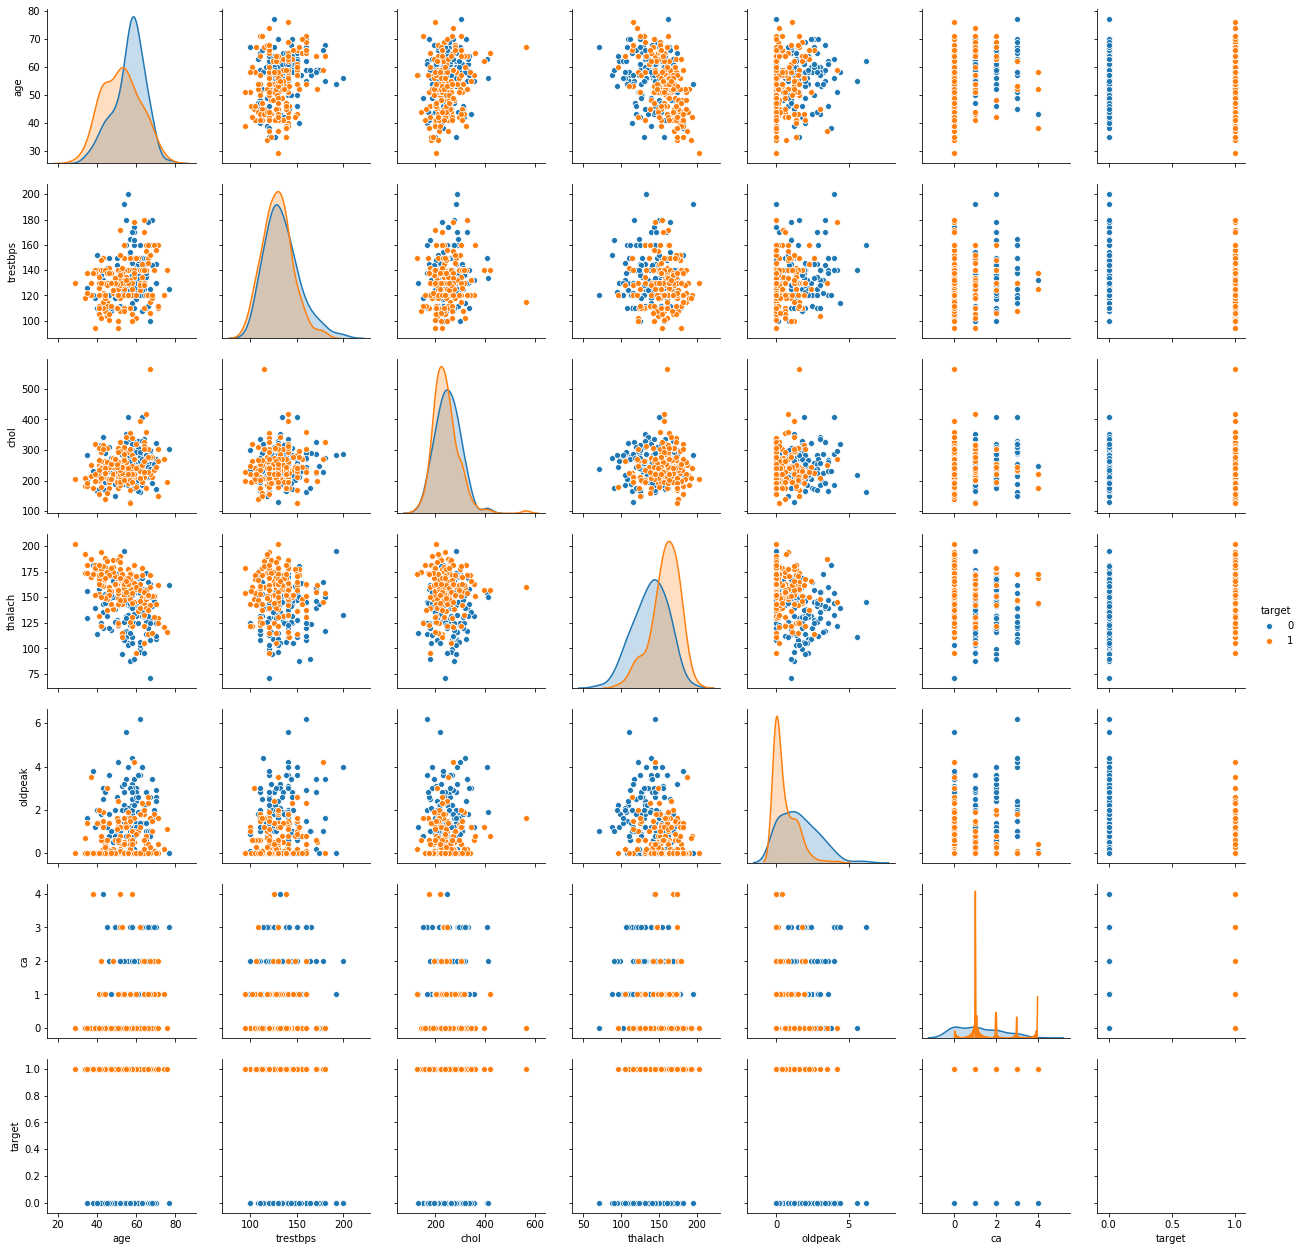

In [11]:
import seaborn as sns
import matplotlib.pyplo as plt
sns.pairplot(df.drop(columns=["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]), hue="target")

In [24]:
#calculate the anove to find best parameters
from sklearn.feature_selection import f_classif
xt1, xte1, yt1, yte1 = train_test_split(df[['age', 'trestbps','oldpeak','thalach','chol']],
                                        df['target'], test_size=0.3, random_state=101)
f1_score, p = f_classif(xt1, yt1)
p_series = pd.Series(p)
p_series.index = df[['age', 'trestbps','oldpeak','thalach','chol']].columns
p_series.sort_values(ascending=True)

#lets drop chol and see if it makes a difference

oldpeak     2.670590e-11
thalach     5.795176e-08
age         6.677114e-04
trestbps    2.122940e-02
chol        6.644873e-02
dtype: float64

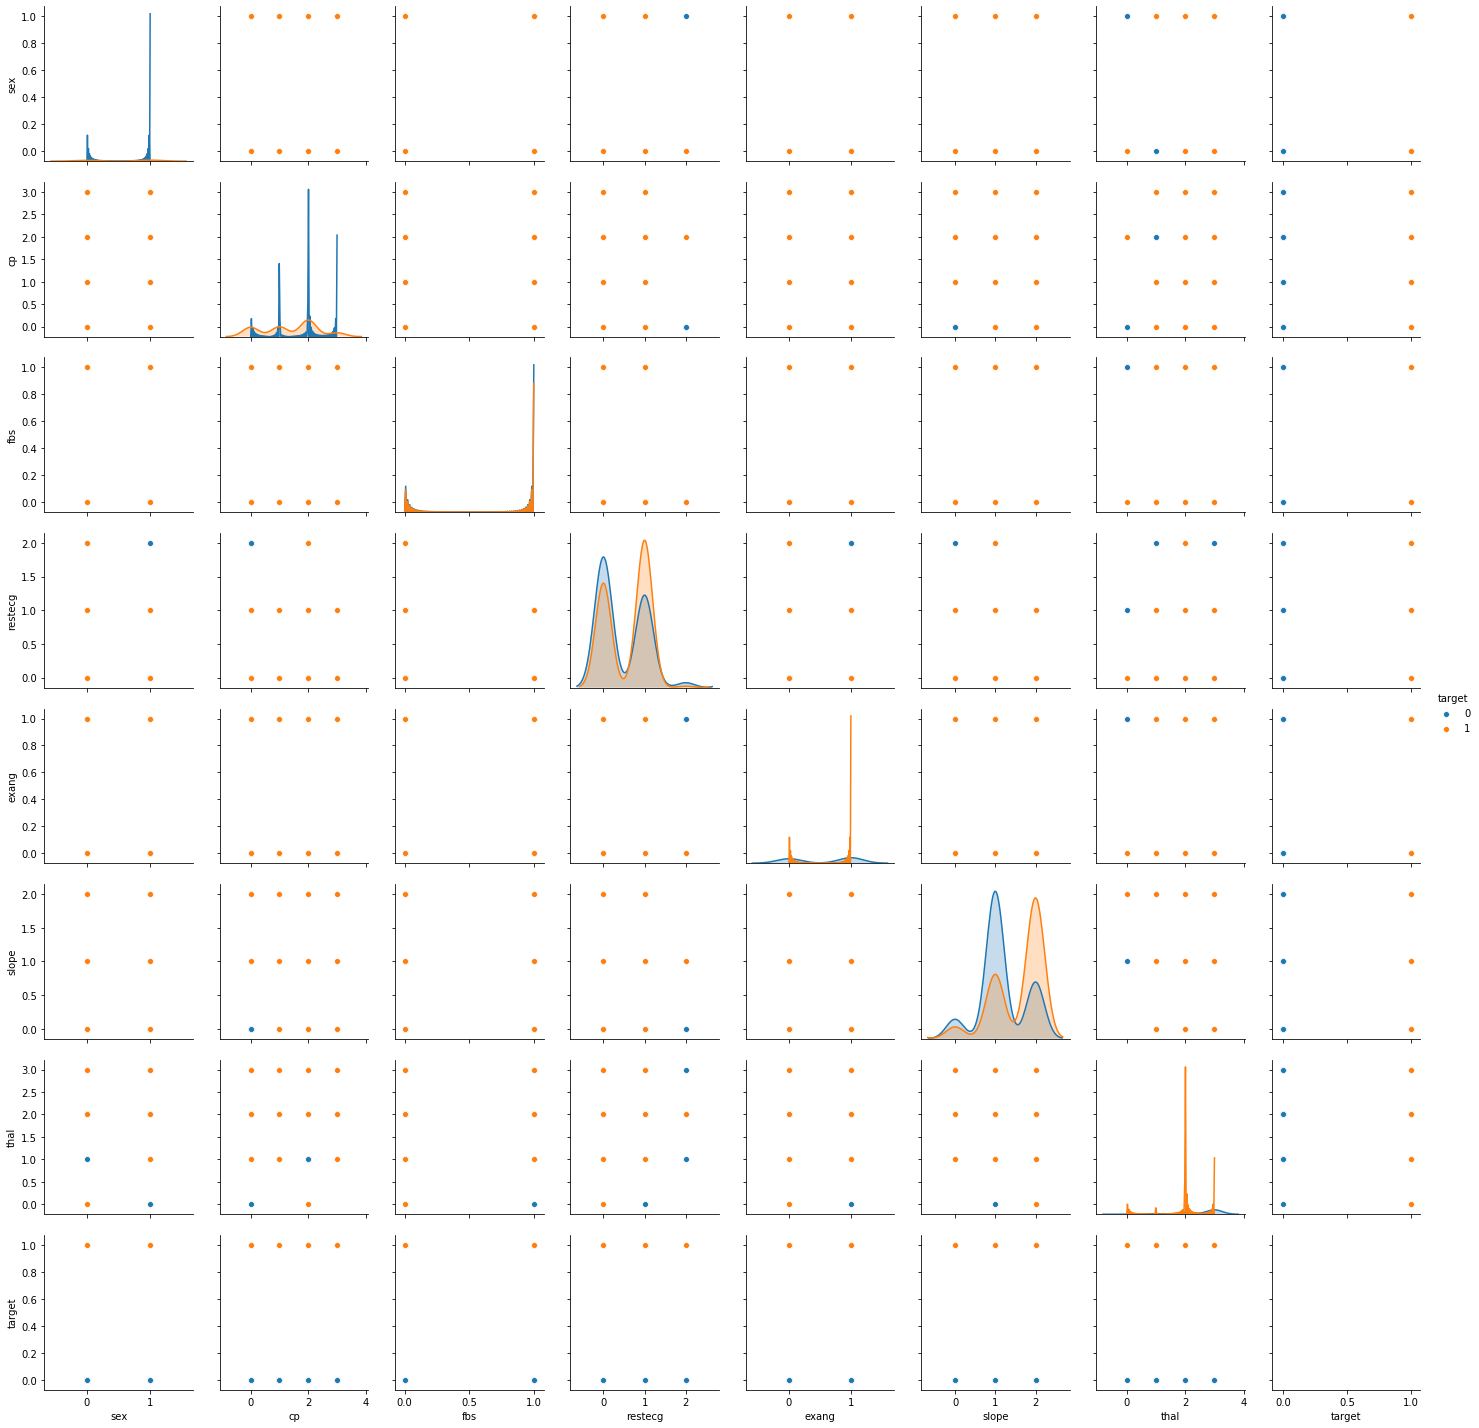

In [14]:
sns.pairplot(df[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal", "target"]], hue="target")

Now the 4 significant values are cp, exang, slope, and thal.

In [98]:
#Now lets train a dt model and compare the 'optimal' features to nonoptimal. 
#just using the default configuration.
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(df.drop(columns=["target"]),
                                                df['target'],
                                                test_size=0.3,
                                                random_state=101)
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

#now get the accuracy scores
print(f"Training Accuracy: {clf.score(xtrain1, ytrain1)}")
print(f"Testing Accuracy: {clf.score(xtest1, ytest1)}")


Training Accuracy: 1.0
Testing Accuracy: 0.7912087912087912


In [119]:
#now compare to the dropped "non optimal" categorical features
xtrain, xtest, ytrain, ytest = train_test_split(df.drop(columns=["target", "thal", "restecg", "fbs"]),
                                                df['target'],
                                                test_size=0.3,
                                                random_state=101)
clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

#now get the accuracy scores
print(f"Training Accuracy: {clf.score(xtrain, ytrain)}")
print(f"Testing Accuracy: {clf.score(xtest, ytest)}")

Training Accuracy: 1.0
Testing Accuracy: 0.7692307692307693
